# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [14]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

male_hmean = male_df['Height'].mean()
male_hsd = male_df['Height'].std()
male_wmean = male_df['Weight'].mean()
male_wsd = male_df['Weight'].std()
female_hmean = female_df['Height'].mean()
female_hsd = female_df['Height'].std()
female_wmean = female_df['Weight'].mean()
female_wsd = female_df['Weight'].std()

data.head(), male_hmean, male_wsd

(  Gender     Height      Weight
 0   Male  73.847017  241.893563
 1   Male  68.781904  162.310473
 2   Male  74.110105  212.740856
 3   Male  71.730978  220.042470
 4   Male  69.881796  206.349801,
 69.02634590621741,
 19.7811545167638)

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

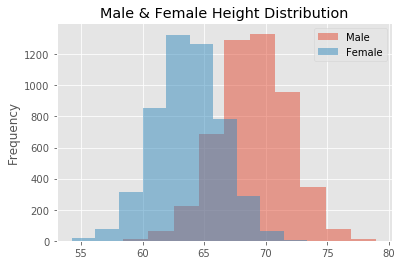

In [24]:
# Your code here
binsize = 10
male_df['Height'].plot.hist(bins = binsize, alpha = 0.5, title='Male & Female Height Distribution', label='Male')
female_df['Height'].plot.hist(bins = binsize, alpha = 0.5, label='Female')
plt.legend()
plt.show()

Yes this make sense. Men typically are taller than women, though there is a good deal of overlap.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

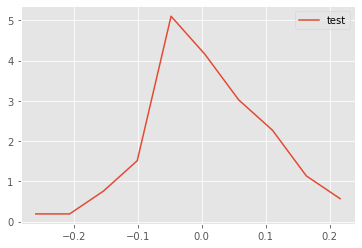

In [28]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

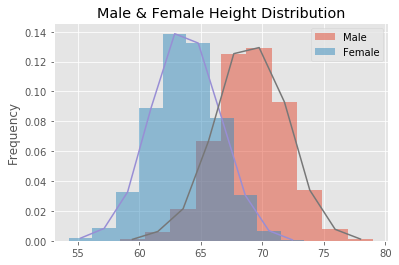

In [37]:
# Your code here 

binsize = 10
male_df['Height'].plot.hist(bins = binsize, density=True, alpha = 0.5, title='Male & Female Height Distribution', label='Male')
female_df['Height'].plot.hist(bins = binsize, density=True, alpha = 0.5, label='Female')
plt.legend()
xf, yf = density(female_df['Height'])
plt.plot(xf, yf)
xm, ym = density(male_df['Height'])
plt.plot(xm, ym)
plt.show()

## Repeat the above exercise for male and female weights

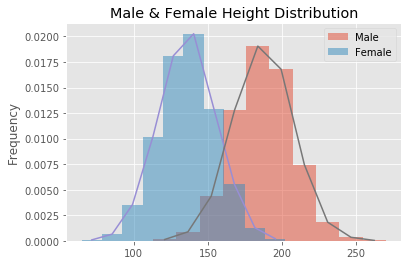

In [40]:
# Your code here 
binsize = 10
male_df['Weight'].plot.hist(bins = binsize, density=True, alpha = 0.5, title='Male & Female Height Distribution', label='Male')
female_df['Weight'].plot.hist(bins = binsize, density=True, alpha = 0.5, label='Female')
xf, yf = density(female_df['Weight'])
plt.plot(xf, yf)
xm, ym = density(male_df['Weight'])
plt.plot(xm, ym)
plt.legend()
plt.show()

## Write your observations in the cell below

# Record your observations - are these inline with your personal observations?
They seem basically right - men are taller and heavier.

# What is the takeaway when comparing male and female heights and weights?
Men are taller and heavier.

## Repeat the above experiments in seaborn and compare with your results

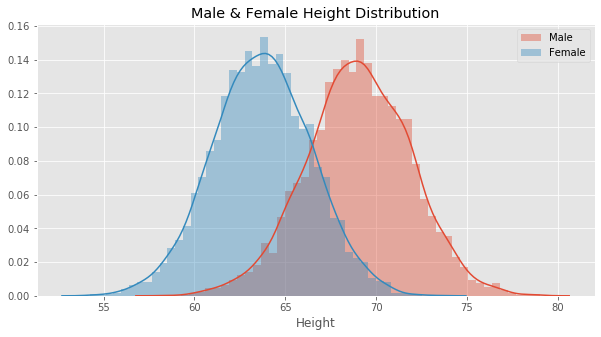

In [62]:
# Code for heights here
import seaborn as sns

fig, (ax) = plt.subplots(figsize=(10, 5))

ax = sns.distplot(male_df.Height, label='Male')
ax = sns.distplot(female_df.Height, label='Female')
ax.legend()
ax.set_title('Male & Female Height Distribution')
plt.show()


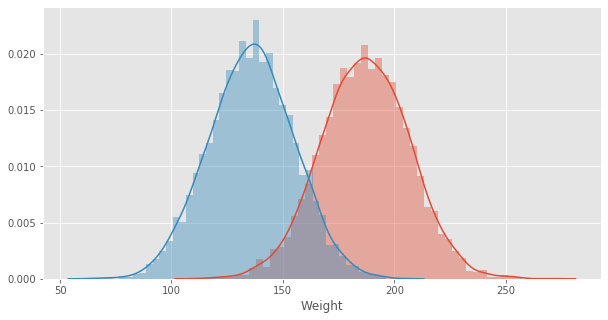

In [55]:
# Code for weights here
fig, (ax) = plt.subplots(figsize=(10, 5))

ax = sns.distplot(male_df.Weight)
ax = sns.distplot(female_df.Weight)

# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

The seaborn method using distplot seems far easier

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.